# HW2 Part II - SOLUTIONS

In [2]:
# Import pandas module
import pandas as pd

%matplotlib inline

# Import the data
Be sure to:
    - Make the dates of data type pandas.tslib.Timestamp
    - Make date column the index column
    - Print the head of the resulting data frame

In [3]:
df = pd.read_csv('drugdeaths.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,CaseNumber,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-09,13-16336,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,NEW LONDON,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)"
2012-12-29,12-18447,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)"
2014-02-18,14-2758,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"
2014-09-07,14-13497,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)"
2013-10-04,13-14421,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)"


In [4]:
df.index.month

array([11, 12,  2, ...,  2,  4,  1])

# Make Month Column
Be sure to:
    - Create a "Month" column whose values are Jan, Feb,...,Nov, Dec
    - Print the head of the data frame

In [6]:
# Make a function
def month(num):
    days = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return days[num-1]

df['Month'] = df.index.month
df['Month'] = df['Month'].apply(month)

In [7]:
df.head()

,CaseNumber,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,...,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc,Month
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-09,13-16336,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)",Nov
2012-12-29,12-18447,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)",Dec
2014-02-18,14-2758,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)",Feb
2014-09-07,14-13497,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)",Sep
2013-10-04,13-14421,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)",Oct


# Q1: How many accidental deaths are there by month?

In [8]:
month_df = df.groupby('Month')
month_df.size()

Month
Apr    314
Aug    237
Dec    280
Feb    326
Jan    320
Jul    250
Jun    350
Mar    329
May    326
Nov    307
Oct    292
Sep    250
dtype: int64

# Q2: What is the city with the most accidental deaths in this dataset?  How many deaths did this city have?

In [48]:
city_df = df.groupby('Death City')
city_deaths = city_df.size()
city_deaths[city_deaths == max(city_deaths)]

Death City
HARTFORD    371
dtype: int64

# Q3:  Find the average age of accidental deaths for all cities in the dataset. 
Hint: use the aggregate method.

    (a) What city has the oldest average age of accidental deaths?  What is the average age of accidental deaths for this city?
    (b) What city has the youngest average age of accidental deaths?  What is the average age of accidental deaths for this city?


In [72]:
x = city_df.aggregate(sum)['Age'] / city_deaths
x = pd.DataFrame(x)
x[x[0] == max(x[0])]

,0
Death City,
GALES FERRY,65.0


In [73]:
x = city_df.aggregate(sum)['Age'] / city_deaths
x = pd.DataFrame(x)
x[x[0] == min(x[0])]

,0
Death City,
NEW PRESTON,17.0


# Q4:  Make a bar chart to display the frequency of the ages that occur in this dataset.  Comment on the chart in 1-2 sentences. 

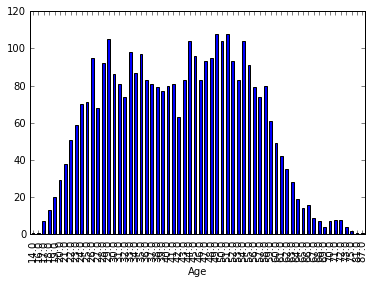

In [19]:
city_df = df.groupby('Age')
city_deaths = city_df.size()
city_deaths.plot(kind="bar")